# Análise Explorátoria 
Usamos os dados do dataset obtido no Kaggle: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

In [65]:
#Importar Biblioyecas

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [54]:
#Importar base de dados

df = pd.read_csv("C:\Puc\db_musica_saude.csv")

In [55]:
#Retorna o número de linhas pelo número de colunas do meu conjunto de dados.

print(df.shape)

(736, 33)


In [56]:
#Retorna o tipo das colunas e a quantidade de valores não nulos que temos nelas.

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [57]:
#Retorna o nome de todas as suas colunas no conjunto de dados.

print(df.columns)

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')


In [58]:
#Retorna as primeiras 5 linhas do meu conjunto de dados.

print(df.head())

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  

In [59]:
#Descobrindo valores nulos

df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [60]:
# Exclundo a coluna Permissions


df = df.drop('Permissions', axis=1)

In [61]:
#Resume a contagem, média, desvio padrão, mínimo e máximo para variáveis numéricas. Estatistica Descritiva com as variaveis numericas 

df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


Age                 AxesSubplot(0.125,0.11;0.0945122x0.77)
Hours per day    AxesSubplot(0.238415,0.11;0.0945122x0.77)
BPM              AxesSubplot(0.351829,0.11;0.0945122x0.77)
Anxiety          AxesSubplot(0.465244,0.11;0.0945122x0.77)
Depression       AxesSubplot(0.578659,0.11;0.0945122x0.77)
Insomnia         AxesSubplot(0.692073,0.11;0.0945122x0.77)
OCD              AxesSubplot(0.805488,0.11;0.0945122x0.77)
dtype: object

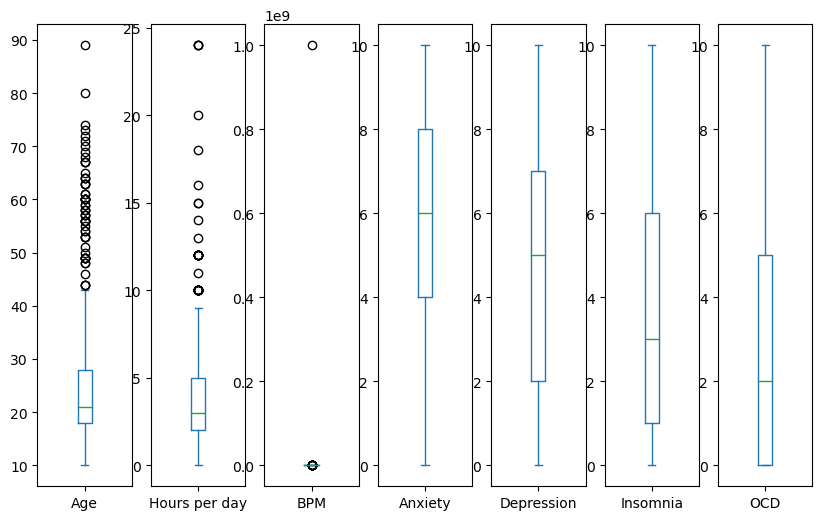

In [62]:
df.plot(kind='box', figsize=(10,6), subplots=True)

# Analisando os outliers

In [63]:
df[df['Age'] >= 40]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
1,8/27/2022 19:57:31,63.0,Pandora,1.50,Yes,No,No,Rock,Yes,No,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
3,8/27/2022 21:40:40,61.0,YouTube Music,2.50,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
57,8/28/2022 13:08:24,42.0,I do not use a streaming service.,0.00,NaN,No,No,Rock,No,Yes,...,Rarely,Rarely,Never,Sometimes,Sometimes,9.0,0.0,10.0,0.0,No effect
68,8/28/2022 13:55:45,41.0,Apple Music,3.00,Yes,Yes,Yes,Metal,Yes,Yes,...,Sometimes,Never,Rarely,Rarely,Never,10.0,7.0,8.0,0.0,Improve
91,8/28/2022 14:47:08,43.0,I do not use a streaming service.,6.00,Yes,Yes,Yes,Video game music,Yes,Yes,...,Sometimes,Rarely,Never,Sometimes,Very frequently,5.0,4.0,8.0,3.0,No effect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,9/12/2022 19:41:23,42.0,Spotify,2.00,Yes,No,No,Metal,Yes,Yes,...,Very frequently,Sometimes,Never,Very frequently,Very frequently,7.0,8.0,5.0,3.0,Improve
643,9/13/2022 0:48:14,42.0,Other streaming service,0.25,No,Yes,No,Classical,Yes,Yes,...,Sometimes,Rarely,Rarely,Sometimes,Never,7.0,9.0,4.0,5.0,Improve
654,9/13/2022 11:16:37,43.0,I do not use a streaming service.,0.00,No,No,No,Rock,No,No,...,Sometimes,Rarely,Rarely,Sometimes,Never,1.0,2.0,2.0,0.0,No effect
695,9/28/2022 17:25:48,89.0,Spotify,24.00,Yes,Yes,Yes,Rap,No,No,...,Rarely,Sometimes,Very frequently,Rarely,Never,0.0,0.0,0.0,0.0,No effect


In [64]:
df[df['Hours per day'] >= 8]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
11,8/27/2022 23:00:32,19.0,YouTube Music,8.0,Yes,No,No,EDM,Yes,No,...,Rarely,Rarely,Sometimes,Rarely,Rarely,1.0,0.0,0.0,1.0,Improve
16,8/27/2022 23:39:41,16.0,Spotify,8.0,Yes,No,No,Hip hop,Yes,Yes,...,Never,Sometimes,Very frequently,Never,Rarely,8.0,8.0,4.0,3.0,Improve
17,8/27/2022 23:39:49,16.0,Spotify,12.0,Yes,No,Yes,Hip hop,Yes,Yes,...,Sometimes,Rarely,Sometimes,Very frequently,Never,5.0,7.0,10.0,0.0,Improve
18,8/27/2022 23:40:55,17.0,Spotify,24.0,Yes,No,No,Rap,Yes,No,...,Rarely,Sometimes,Very frequently,Very frequently,Never,7.0,5.0,0.0,3.0,Improve
20,8/27/2022 23:43:06,15.0,Apple Music,8.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Rarely,Very frequently,Sometimes,Sometimes,6.0,9.0,3.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,9/28/2022 17:25:48,89.0,Spotify,24.0,Yes,Yes,Yes,Rap,No,No,...,Rarely,Sometimes,Very frequently,Rarely,Never,0.0,0.0,0.0,0.0,No effect
699,10/3/2022 9:30:19,16.0,Spotify,9.0,Yes,No,No,Metal,No,Yes,...,Sometimes,Rarely,Rarely,Very frequently,Never,10.0,10.0,10.0,8.0,Improve
710,10/4/2022 4:50:49,16.0,Spotify,8.0,Yes,Yes,Yes,Rock,Yes,No,...,Sometimes,Rarely,Never,Very frequently,Sometimes,8.0,9.0,5.0,10.0,Improve
713,10/4/2022 14:50:28,17.0,YouTube Music,8.0,Yes,No,No,Pop,Yes,Yes,...,Very frequently,Never,Rarely,Rarely,Very frequently,5.0,2.0,4.0,7.0,No effect


# Correlação de Pearson entre a variável "Hours per day" e as variáveis de saúde mental (Anxiety, Depression, etc.):

Hours per day    float64
Anxiety          float64
Depression       float64
Insomnia         float64
OCD              float64
dtype: object
Correlação de Pearson:
 - "Hours per day" vs Anxiety: Corr = 0.049, p-valor = 0.181
 - "Hours per day" vs Depression: Corr = 0.111, p-valor = 0.003
 - "Hours per day" vs Insomnia: Corr = 0.142, p-valor = 0.000
 - "Hours per day" vs OCD: Corr = 0.119, p-valor = 0.001


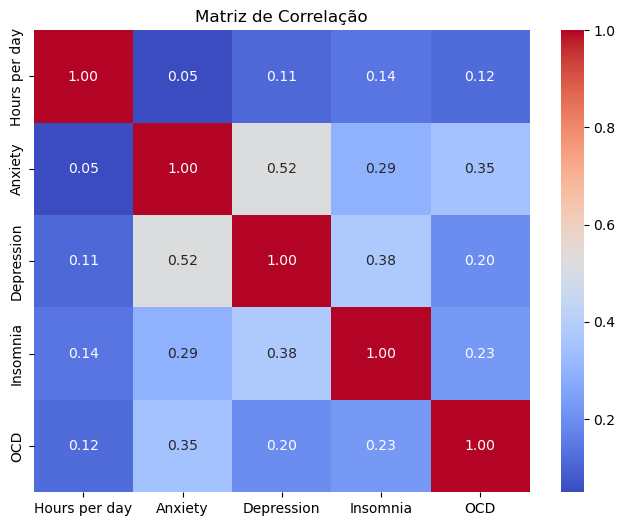

In [67]:

# Selecionar colunas de interesse
health_vars = ['Anxiety', 'Depression', 'Insomnia','OCD']
df_clean = df[['Hours per day'] + health_vars].dropna()

# Verificar tipos de dados
print(df_clean.dtypes)

# Análise de Correlação de Pearson
print("Correlação de Pearson:")
for var in health_vars:
    corr, p_value = pearsonr(df_clean['Hours per day'], df_clean[var])
    print(f' - "Hours per day" vs {var}: Corr = {corr:.3f}, p-valor = {p_value:.3f}')

# Visualizar a matriz de correlação
corr_matrix = df_clean[['Hours per day'] + health_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


